# Анализ бизнес-показаелей приложения Procrastinate Pro+

## Шаг 1. Загрузка данные и подготовка к анализу


In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime
import math
import time
from datetime import datetime
from datetime import date, timedelta as td

Прочитаем исходные данные и сохраним их в переменные.

In [2]:
orders = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/orders_info_short.csv')  
visits = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/visits_info_short.csv')  
costs = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/costs_info_short.csv')

Посмотрим на первые строки всех трёх таблиц, чтобы иметь представление о данных.

In [3]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [4]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Посмотрим на таблицу 'orders'.

In [6]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Посмотрим на таблицу 'visits'.

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Посмотрим на таблицу 'costs'.

In [8]:
costs.info()
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Приведём все столбцы с датами в формат datetime.

In [9]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
costs['dt'] = pd.to_datetime(costs['dt'])

Приведём названия столбцов к нижнему 'змеиному' регистру.

In [10]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower() for x in costs.columns]

Посмотрим на информацию о таблицах после проведенных изменений.

In [11]:
print(orders.info())
print(' ')
print(visits.info())
print(' ')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usag

В таблице visits есть информация о рекламных источниках, категориях устройств и стран. Посмотрим, сколько у нас уникальных значений в соответствующих столбцах, и какие они.

In [12]:
print('Всего пользователей:', visits['user_id'].nunique())
print('Всего пользователей, сделавших заказы:', orders['user_id'].nunique())
print(' ')
print('Всего устройств:', visits['device'].nunique())
print('Наименования устройств:', visits['device'].unique())
print(' ')
print('Всего каналов:', visits['channel'].nunique())
print('Наименования каналов:', visits['channel'].unique())
print(' ')
print('Всего регионов:', visits['region'].nunique())
print('Наименования регионов:', visits['region'].unique())

Всего пользователей: 150008
Всего пользователей, сделавших заказы: 8881
 
Всего устройств: 4
Наименования устройств: ['iPhone' 'Mac' 'Android' 'PC']
 
Всего каналов: 11
Наименования каналов: ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
 
Всего регионов: 4
Наименования регионов: ['United States' 'UK' 'France' 'Germany']


Проверим таблицы на наличие дубликатов

In [13]:
print(orders.duplicated().sum())
print(visits.duplicated().sum())
costs.duplicated().sum()

0
0


0

### Вывод

В ходе предобработки названия столбцов были переведены в "змеиный" регистр, а в колонки с датами был изменен тип данных на datetime. Пропусков ни в одной из таблиц не обнаружено. Дубликатов также не обнаружено.

В данных имеется информация о посещении приложения с четырех типов устройств (iPhone, Mac, Android, PC), из четырех стран (США, Англии, Франции, Германии) и из десяти источников привлечения (помимо органического). Всего пользователей - 150008, а сделали заказы из них - 8881.

## Шаг 2.  Функции для расчета и анализа LTV, ROI, удержания и конверсии


Зададим функции для расчета и визуализации метрик, которые будут использоваться в дальнейшем анализе.

### Функция для создания профилей пользователей

In [14]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта конверсии

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта LTV и ROI

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для визуализации LTV и ROI

In [18]:
# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



events = None  # других событий нет

# преобразование данных о времени


# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2020, 10, 27)

days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles(visits, orders, costs)

### Функция для визуализации удержания

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Исследовательский анализ данных


Зададим функцию для создания профилей пользователей.

In [21]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, заказах и тратах на рекламу

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Определим минимальную и максимальную дату привлечения пользователей

In [23]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Минимальная дата привлечения', min_analysis_date)
print('Максимальная дата привлечения',  observation_date)   

Минимальная дата привлечения 2019-05-01 00:00:00
Максимальная дата привлечения 2019-10-27 00:00:00


### Анализ пользователей по регионам

Посмотрим, какое количество посетителей приходит из каждого региона, а затем посчитаем долю платящих покупателей по странам.

In [24]:
region = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
region['share'] = ((region['user_id'] / profiles['region'].count()) * 100)
region

,user_id,share
region,,
United States,100002,66.664445
UK,17575,11.716042
France,17450,11.632713
Germany,14981,9.986801


In [25]:
#посчитаем количество и долю платящих пользователей
region_paid = profiles.query('payer == True')
region_paid = region_paid.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
region_paid['share'] = ((region_paid['user_id'] / profiles.query('payer == True')['device'].count()) * 100)
region_paid['share_to_all'] = ((region_paid['user_id'] / region['user_id']) * 100)
region_paid

,user_id,share,share_to_all
region,,,
United States,6902,77.716473,6.901862
UK,700,7.881995,3.982930
France,663,7.465376,3.799427
Germany,616,6.936156,4.111875


Больше всего пользователей приходит из США. Доля остальных стран (Великобритания, Франция, Германия) примерно одинаковая.
Соотношение платящих пользователей к общему количеству также лучше в США (6,9%) против остальных стран (около 4%).

### Анализ пользователей с разбивкой по устройствам

Проверим, с каких устройств заходят пользователи, а затем - какая доля платящих пользователей с каждого устройства.

In [26]:
device = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
device['share'] = ((device['user_id'] / profiles['device'].count()) * 100)
device

,user_id,share
device,,
iPhone,54479,36.317396
Android,35032,23.353421
PC,30455,20.302251
Mac,30042,20.026932


Посчитаем количество и долю платящих пользователей с разбивкой по устройствам


In [27]:
device_paid = profiles.query('payer == True')
device_paid = device_paid.groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
device_paid['share'] = ((device_paid['user_id'] / profiles.query('payer == True')['device'].count()) * 100)
device_paid['share_to_all'] = ((device_paid['user_id'] / device['user_id']) * 100)
device_paid

,user_id,share,share_to_all
device,,,
iPhone,3382,38.081297,6.207897
Android,2050,23.082986,5.851793
Mac,1912,21.529107,6.364423
PC,1537,17.306610,5.046790


Чаще всего пользователи используют IPhone. Среди платящих пользователей на третье место выходит Mac, хотя в общей массе это устройство было на последнем месте. Пользователи конвертируются в плательщиков примерно одинаково вне зависимости от устройства.

### Анализ пользователей с разбивкой по каналам привлечения

Выясним, по каким рекламным каналом шло привлечение. Проделаем те же шаги, что и по регионам и устройствам.

In [28]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
channel['share'] = ((channel['user_id'] / profiles['channel'].count()) * 100)
channel

,user_id,share
channel,,
organic,56439,37.623993
FaceBoom,29144,19.428297
TipTop,19561,13.039971
OppleCreativeMedia,8605,5.736361
LeapBob,8553,5.701696
WahooNetBanner,8553,5.701696
RocketSuperAds,4448,2.965175
MediaTornado,4364,2.909178
YRabbit,4312,2.874513


Посмотрим на долю источников, из которых приходили платящие пользователи.

In [29]:
channel_paid = profiles.query('payer == True')
channel_paid = channel_paid.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
channel_paid['share'] = ((channel_paid['user_id'] / profiles.query('payer == True')['device'].count()) * 100)
channel_paid['share_to_all'] = ((channel_paid['user_id'] / channel['user_id']) * 100)
channel_paid

,user_id,share,share_to_all
channel,,,
FaceBoom,3557,40.051796,12.204914
TipTop,1878,21.146267,9.600736
organic,1160,13.061592,2.055316
WahooNetBanner,453,5.100777,5.296387
AdNonSense,440,4.954397,11.340206
RocketSuperAds,352,3.963518,7.913669
LeapBob,262,2.950118,3.063253
OppleCreativeMedia,233,2.623578,2.707728
lambdaMediaAds,225,2.533498,10.469986


Здесь видно, что лучше всего конвертируются пользователи, привлеченные из каналов Faceboom, AdNonSense, lambdaMediaAds и Tip Top.

Построим графики по источникам привлечения всех пользоваталей и платящих.

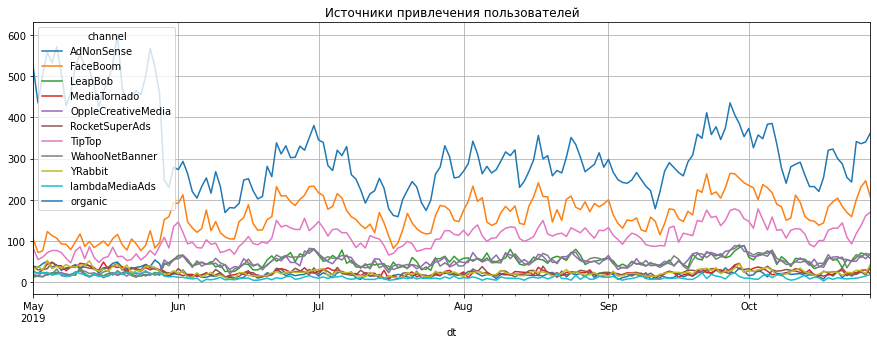

In [30]:

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.title('Источники привлечения пользователей')
plt.show()

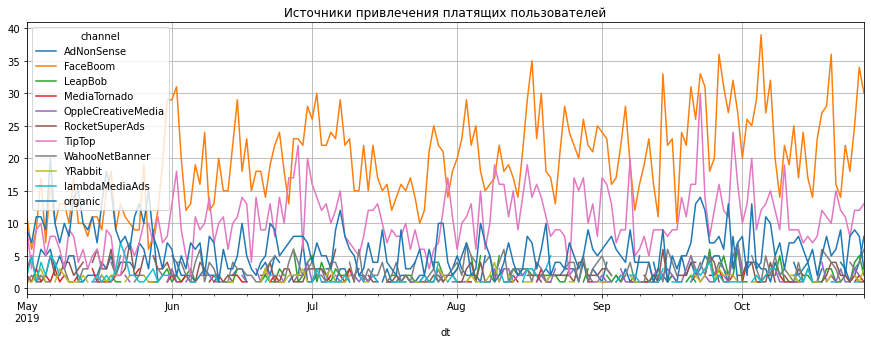

In [31]:
profiles.query('payer == True').pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.title('Источники привлечения платящих пользователей')
plt.show()

Мы видим, что больше всего пользователей приходило из органических источников, особенно в мае. С июня возросло привлечение пользоваталей из платных источников, но больше пользователей всё равно приходит самостоятельно.
Среди плательщиков на первое место вышли каналы FaceBoom и Tip Top, а затем уже органические пользователи.

### Вывод

В ходе исследования было выявлено, что почти 67% всех пользователей приходит из США, а доля платящих пользователей из этой страны - 78%. Остальные страны (Великобритания, Франция, Германия) приносят примерно одинаковое количество пользователей (10-12% всего и 7-9% платящих). Пользователи из США также чаще других конвертируются в плательщиков, так что можно считать их более лояльной аудиторией.

Чаще всего пользователи используют IPhone. Среди платящих пользователей на третье место выходит Mac, хотя в общей массе это устройство было на последнем месте. Около 6% всех пользователей совершают покупки в приложении.

больше всего пользователей приходило из органических источников, особенно в мае. С июня возросло привлечение пользоваталей из платных источников, но больше пользователей всё равно приходит самостоятельно.
Платящие пользователи были привлечены прежде всего из каналов FaceBoom и Tip Top, а затем уже органическим путём. Лучше всего конвертируются пользователи, привлеченные из каналов Faceboom, AdNonSense, lambdaMediaAds и Tip Top.

Можно предположить, что в июне увеличили бюджет на рекламу.

## Шаг 4. Маркетинг

Теперь проведем исследование расходов на рекламу.
Сначала посчитаем, сколько составил рекламный бюджет за всё время.

In [32]:
print('Общие расходы на рекламу составили ', costs['costs'].sum())

Общие расходы на рекламу составили  105497.30000000002


Посмотрим, как расходы распределились по источникам привлечения.

In [33]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Построим график, чтобы посмотреть визуально, как изменялись расходы на тот или иной источник во времени.

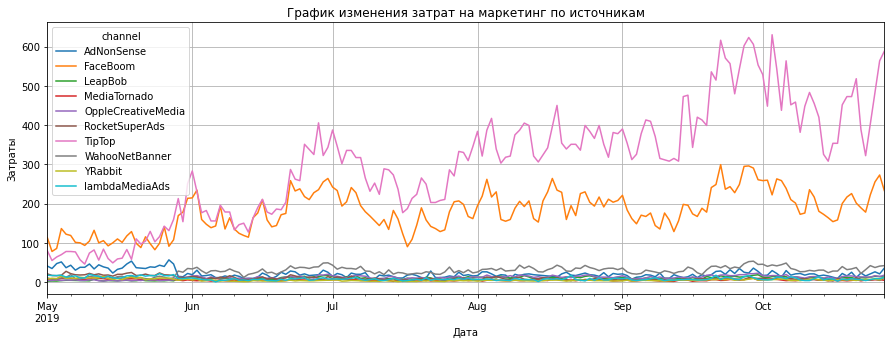

In [34]:
costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.title('График изменения затрат на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Tip Top и FaceBoom приводят большое количество посетителей, то есть увеличение расходов на рекламу в этих источниках должно быть правильным решением. Предположение, сделанное в предыдущем шаге, оказалось верным: в июне стали вкладывать больше средста в два самых эффективных источника привлечения.

Рассчитаем средний CAC на одного пользователя всего и для каждого источника привлечения. Выведем еще раз таблицу с профилями пользователей.

In [35]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [36]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Если анализировать среднюю стоимость привлечения по всем источникам трафика, то цифры получаются заниженными из-за пользователей, которые пришли бесплатно, из органических источников.
Посмотрим, как изменится картина, если исключить их из датафрейма.

In [37]:
profiles_paid = profiles.query('channel != "organic"')
profiles_paid.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Теперь средняя стоимость выглядит более реалистично - 1,12 у.е..
Найдём средний САС в зависимости от источника траффика.

In [38]:
# считаем средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values(by='cac', ascending=False)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


У источника Tip Top средний расход на привлечение гораздо выше, чем у других источников.
Посмотрим на графике, как с течением времени изменялся средний CAC.

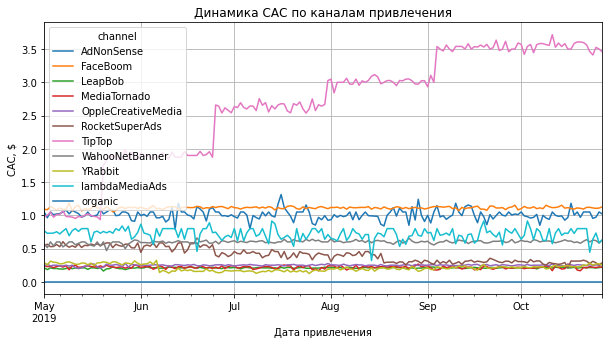

In [39]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Видим, что средняя стоимость привлечения клиента с помощью источника Tip Top растет. За полгода стоимость выросла в 3,5 раза.
Стоимость привлечения по остальным источникам была стабильна за этот период.

Таким образом, расходы на маркетинг увеличились с июня на источники Faceboom и Tip Top. При этом стоимость привлечения из истоника Faceboom осталась прежней, а из Tip Top значительно выросла.

### Вывод

Было проведено исследование расходов на рекламу, в ходе которого выяснилось, что средняя стоимость привлечения пользователя составила 0.70 у.е., но сильно выделяется один источник - Tip Top. Средняя стоимость привлечения пользователя из этого источника в среднем составила 2,79 у.е., а росла она, начиная с середины мая, достигнув максимального значения 3,72 у.е. в сентябре, на котором и держится до конца исследуемого периода.

## Шаг 5. Окупаемость рекламы для привлечения пользователей


Проанализируем окупаемость рекламы. 
Сначала зададим момент анализа (1 ноября 2019 года) и горизонт анализа - 14, а также исключим органических пользователей.

In [40]:

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [41]:
profiles = profiles.query('channel != "organic"')

### LTV и ROI

Построим графики LTV и ROI.

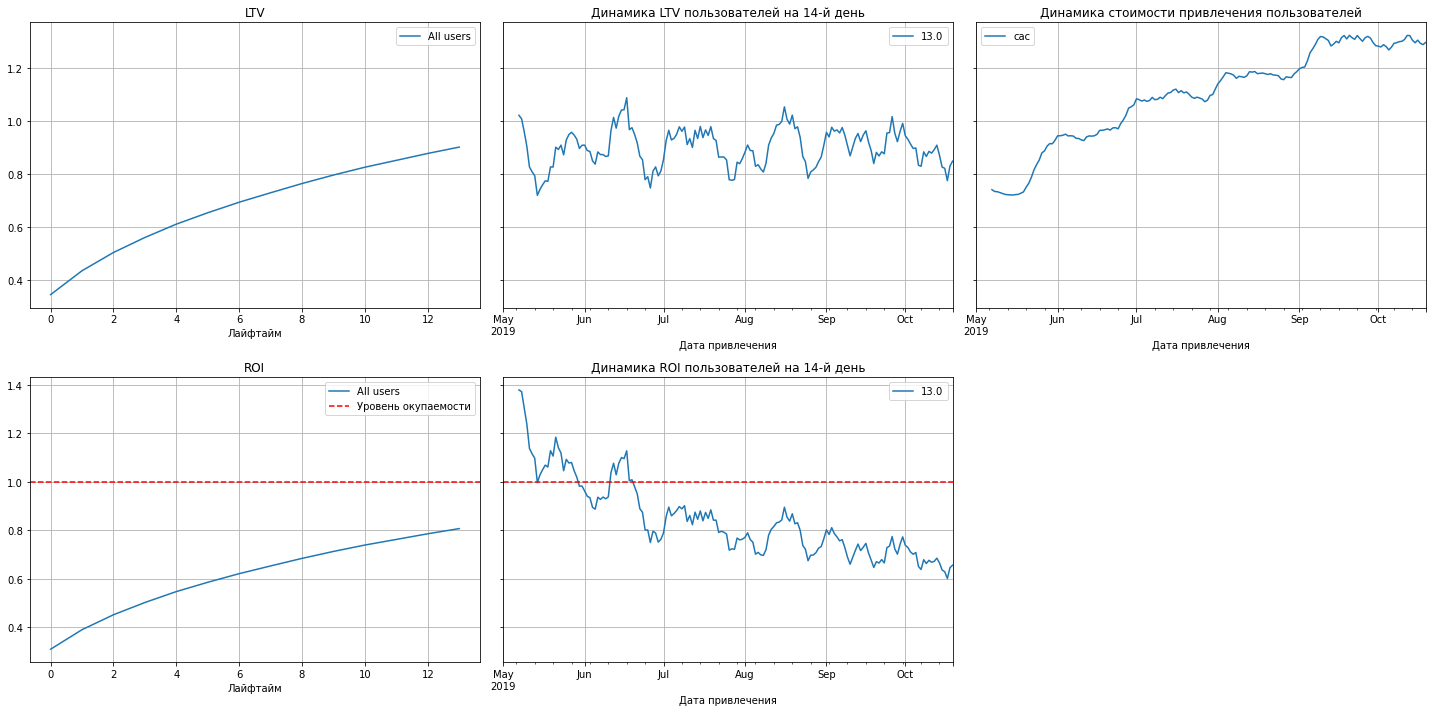

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по графикам, к концу исследуемого периода реклама не окупается, т.к. ROI доходит только до 80%.
Стоимость привлечения пользователей растет. LTV можно назвать стабильным, а вот ROI падает. В начале периода этот показатель превышал уровень окупаемости, а затем стал падать. Уже понятно, что план компании, по которому вложения в рекламу должны окупиться за две недели, не осуществляется.


В предыдущих шагах удадось заметить увеличение вложений в канал Tip Top, а также удорожание стоимости привлечения пользователя из этого источника. Есть основания полагать, что одна из проблем как раз в этом канале.

Посмотрим на разбивку LTV и ROI по устройствам, стране и устройству, чтобы разобраться в причинах.
Сначала посчитам показатели с разбивкой по устройствам.

#### LTV и ROI по устройствам

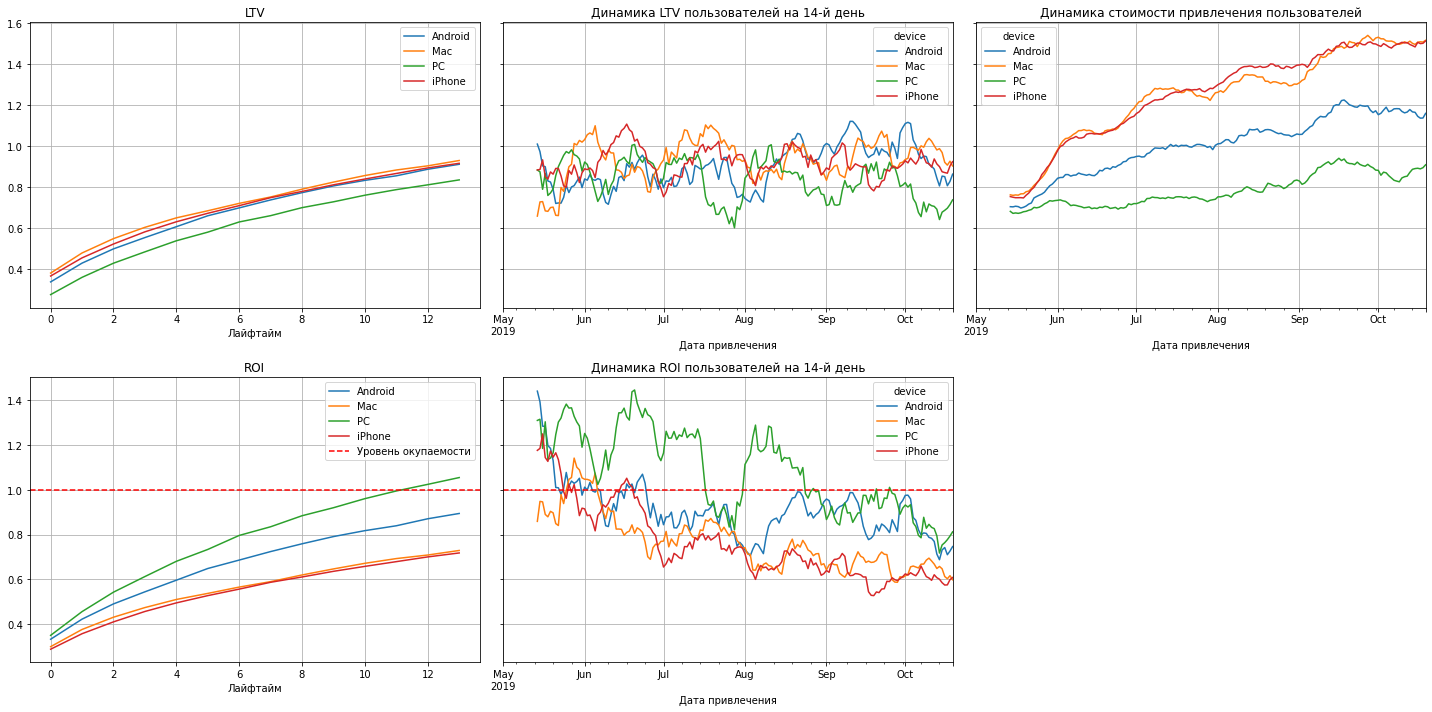

In [43]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы видим, что LTV ниже всего у пользователей PC. В динамике стоимость привлечения пользователей увеличивается по всем устройствам, но как раз у пользователей PC увеличение происходит медленнее, а быстрее всех - у IPhone И Mac. На 14-ый день только пользователи устройств PC начали окупаться, пользователи остальных устройств уровня окупаемости не достигли вообще. Особенно далеки оказались пользователи IPhone И Mac.
По динамике ROI заметно, что окупаемость была со всех устройств, кроме Mac, до июня, а затем только пользователи PC окупались. В сентябре за две недели не окупались уже пользователи всех устройств.
Таким образом, стоимость привлечения пользователей PC была самой низкой, а окупаемость при этом - самой высокой.
А вот пользователи устройств IPhone И Mac требуют повышенного внимания, т.к. при увеличении стоимости привлечения окупаемость по ним падает.


Посмотрим на LTV и ROI с разбивкой по странам.

#### LTV и ROI по странам

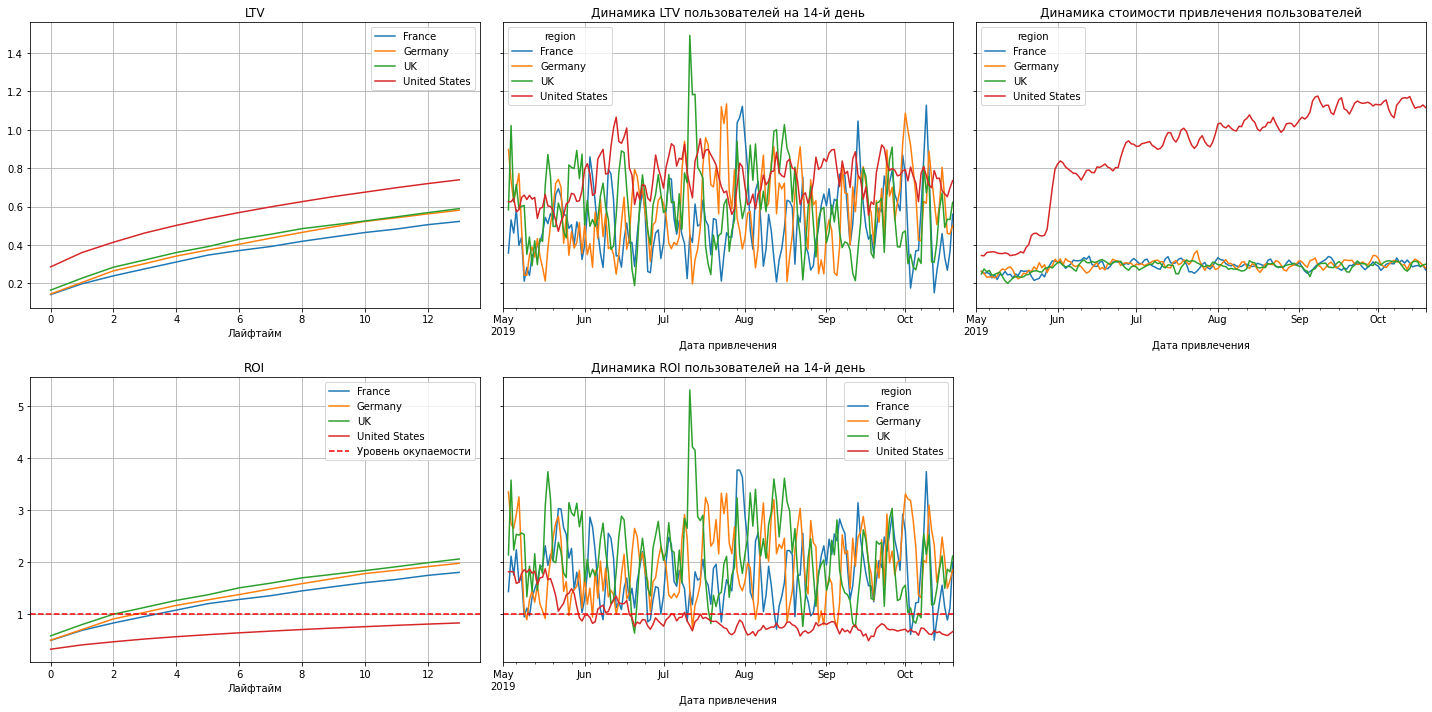

In [44]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
    )
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=3)
# постройте графики LTV, CAC и ROI

Графики показывают нам, что стоимость привлечения пользователей в США - самая высокая, к тому же растет со временем, особенно резкий скачек заметен к июню. И пользователи из США не окупаются за 2 недели.
Великобритания, Германия и Франция примерно одинаковы по всем показателям. Привлечение пользователей из этих стран окупается по плану, стоимость привлечения остается стабильной.
Стоит обратить внимание на пользователей из США, т.к. из этой страны поступает наибольшее количество пользователей.


#### LTV и ROI по каналам

Теперь проверим те же показатели по источникам привлечения.

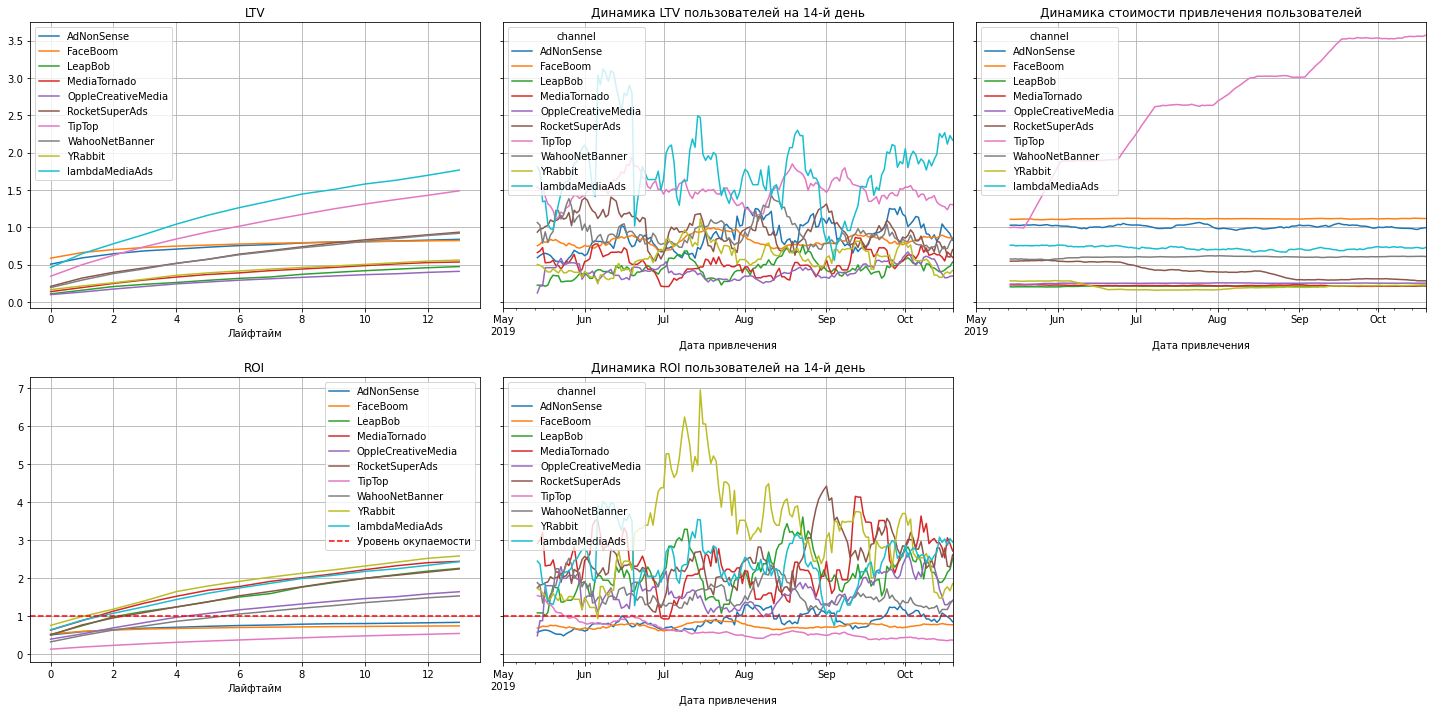

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Видно три источника, вложения в которые не окупаются: Tip Top, FaceBoom, LeapBoom.
При этом стоимость привлечения растет как раз по каналу Tip Top, привлечение из всех остальных источников остается стабильной на протяжении периода анализа.
Источник YRabbit - самый эффективный. Окупался хорошо, особенно в июле, стоимость привлечения невысокая.


Пока что можно сделать выводы, что неэффективным оказалось увеличение расходов на рекламу в США, в источник Tip Top  и у пользователей с устройствами IPhope и Mac.

### Конверсия и удержание пользователей 

#### Конверсия и удержание по устройствам

Посмотрим на конверсию с разбивкой по устройствам.

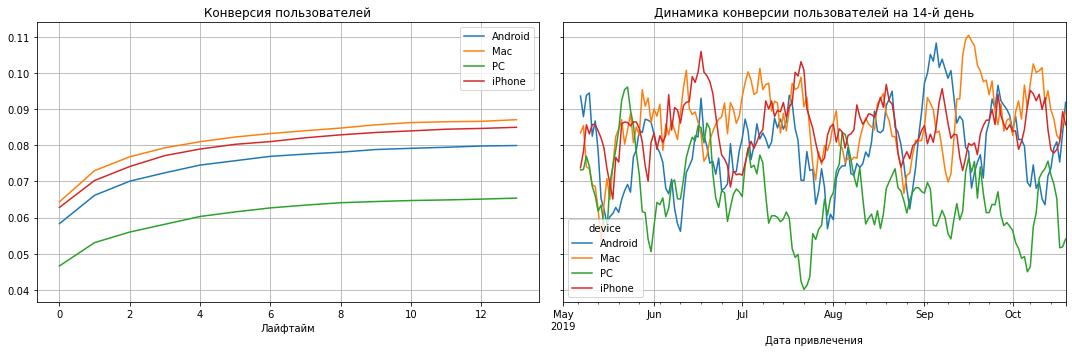

In [46]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия не вызывает подозрений, динамика не имеет необычного тренда.


Теперь посмотрим удержание с разбивкой по устройствам

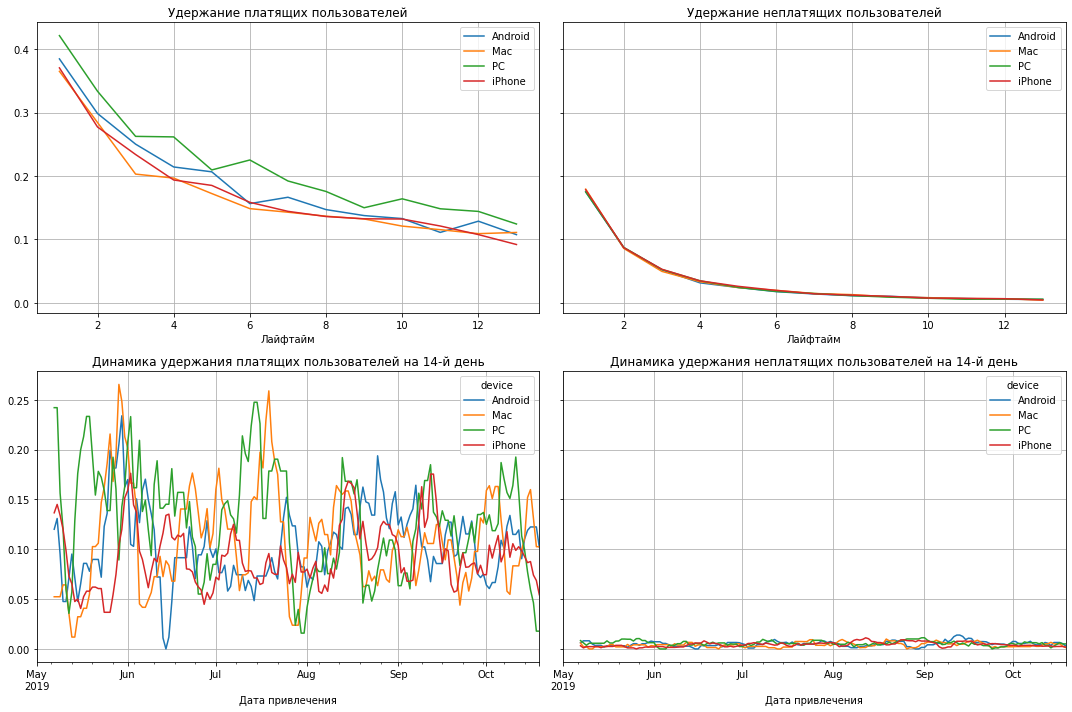

In [47]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи всех устройств удерживаются примерно одинаково. Среди платящих пользователей чуть лучше удерживаются пользователи PC. Среди неплатящих пользователей нет явных лидеров или аутсайдеров.

#### Конверсия и удержание по странам

Теперь проверим конверсию и удержание с разбивкой по странам.

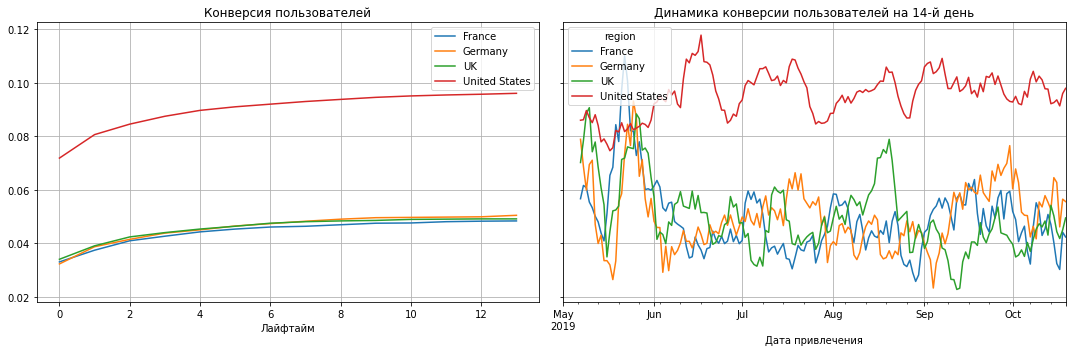

In [48]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Здесь снова выделяются пользователи из США - у них самая высокая конверсия. У пользователей из других стран она почти одинаково низкая, но в динамике есть скачок в конце мая, как раз в тот период, когда были замечены другие события (увеличение расходов на рекламу, увеличение стоимости привлечения клиента). То есть конверсия стала ниже именно тогда, когда увеличили расходы на рекламу. Но нельзя с уверенностью сказать, что здесь есть причинно-следстванная связь.

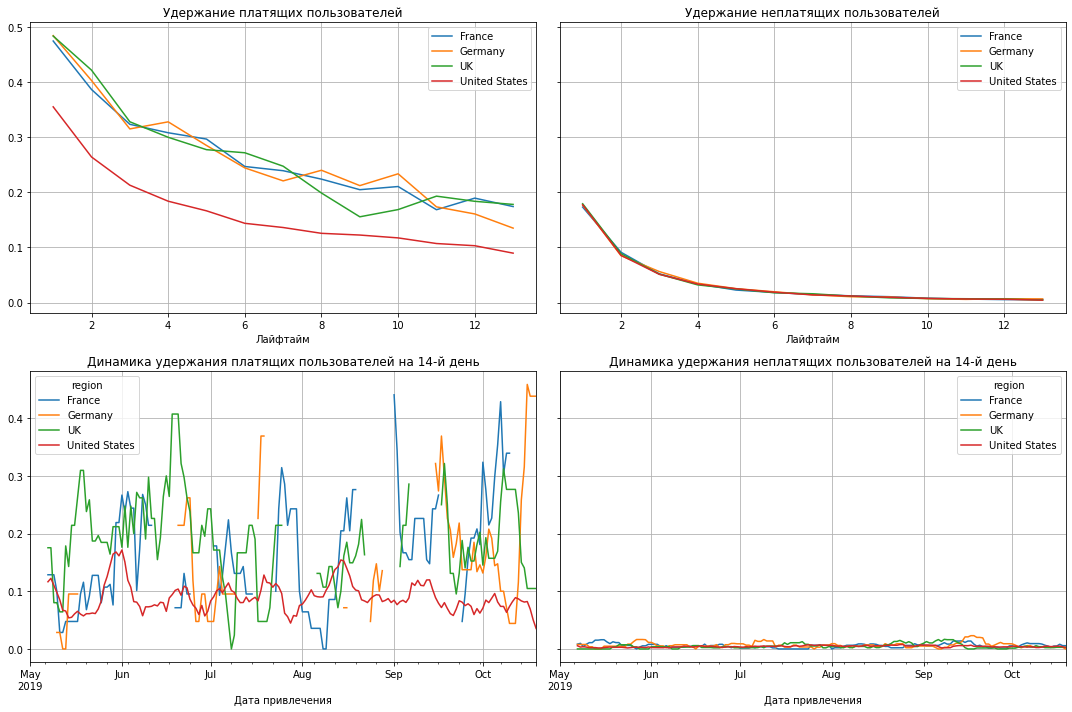

In [49]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Неплатящие пользователи из всех стран удерживаются плохо, а среди платящих пользователей хуже всего удержание в США.

#### Конверсия и удержание по каналам

Посмотрим на конверсию и удержание пользователей с разбивкой по каналам привлечения.

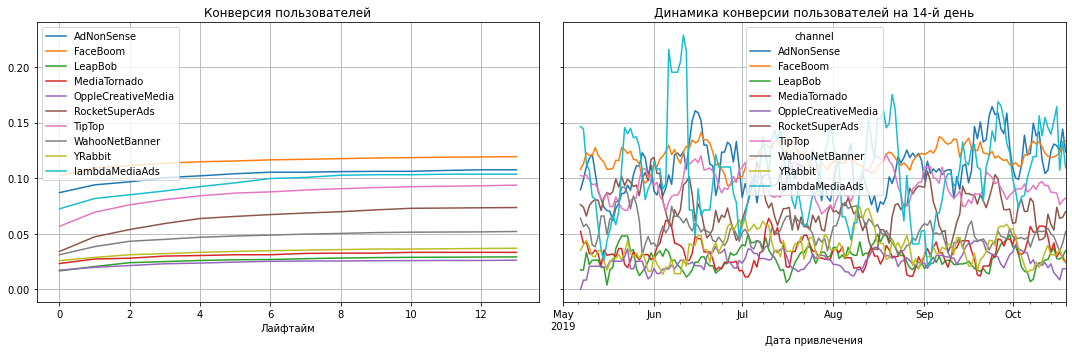

In [50]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Хорошо конвертируются пользователи, пришедшие из каналов Faceboom, LambdaMediaAds, AdNonSense. Tip Top, в который вложено много средств, конвертируется средне. 

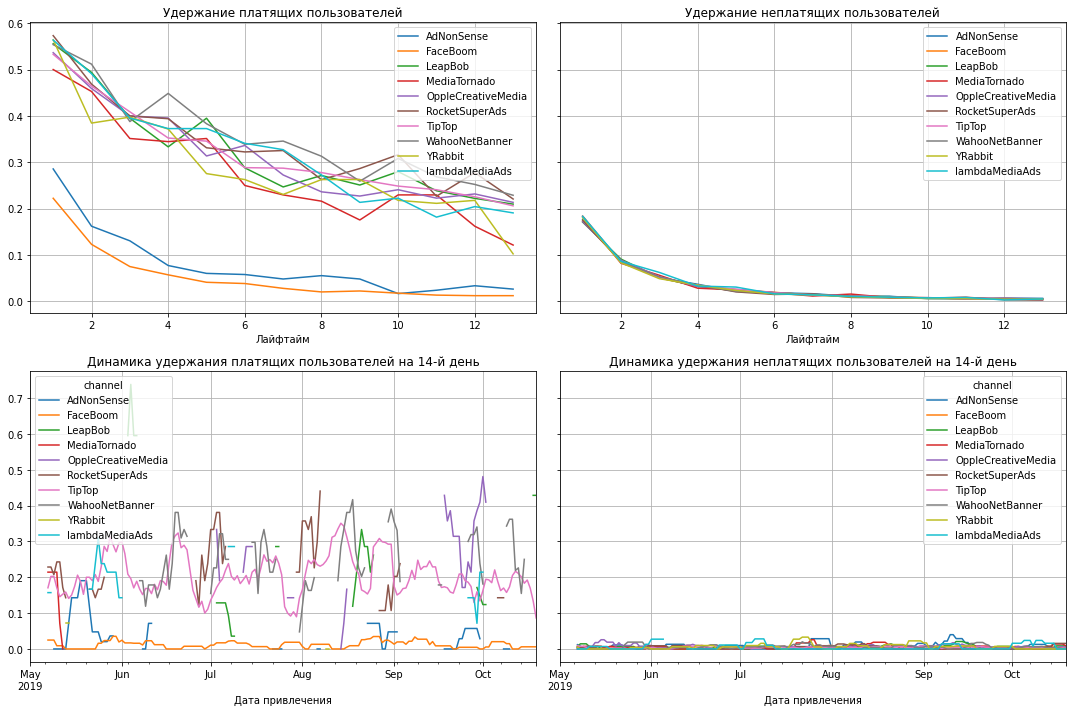

In [51]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание неплатящих пользователей совсем не зависит от источника, из которого они пришли. Хорошо заметно, что явно хуже удерживаются пользователи из FaceBoom и AdNonSense

### Вывод

По графикам мы увидели, что в начале исследуемого периода реклама окупалась за две недели, но потом началось снижение окупаемости.
Были выяслены страны, устройства и источники привлечения, которые могли повлиять на снижение окупаемости - это США, устройства Mac и iPhone, источники Tip Top, FaceBoom, LeapBoom.

Возможно, вложения в канал Tip Top было неоправдано, т.к. увеличение рекламного бюджета в этот источник привело к удорожанию привлечения пользователя, а окупаемость при этом стала падать.

Также стоит обратить внимание на пользователей из США, т.к. они составляют основной контингент. Они хорошо конвертируются, но в целом рекламный бюджет не окупается за две недели. 


## Шаг 6. Общие выводы

1. В ходе исследования было выявлено, что почти 67% всех пользователей приходит из США, а доля платящих пользователей из этой страны - 78%. Остальные страны (Великобритания, Франция, Германия) приносят примерно одинаковое количество пользователей (10-12% всего и 7-9% платящих).

2. Чаще всего пользователи используют IPhone. Среди платящих пользователей на третье место выходит Mac, хотя в общей массе это устройство было на последнем месте.

3. Больше всего пользователей приходило из органических источников, особенно в мае. С июня возросло привлечение пользоваталей из платных источников, но больше пользователей всё равно приходит самостоятельно.
Платящие пользователи были привлечены прежде всего из каналов FaceBoom и Tip Top, а затем уже органическим путём.

4. Судя по графикам, о в июне увеличили бюджет на рекламу, средства были вложены в основном в источники Faceboom и Tip Top. При этом стоимость привлечения из источника Faceboom осталась прежней, а из Tip Top значительно выросла.

5. Средняя стоимость привлечения пользователя из источника Tip Top значительно выше, чем из других источников. Она начала расти со второй половины мая, и тенденция к росту продолжалась до конца исследуемого периода. 

6. В начале исследуемого периода реклама окупалась за две недели, но потом началось снижение окупаемости.
Были выяслены страны, устройства и источники привлечения, которые могли повлиять на снижение окупаемости - это США, устройства Mac и iPhone, источники Tip Top, FaceBoom, LeapBoom.

Видно, что средства в рекламу вложены не зря, т.к. пользователи из платных источников привлечения стабильно лучше конвертируются и удерживаются. Но с окупаемостью есть проблемы, т.к. в среднем за две недели не достигается уровень окупаемости.

Возможно, вложения в канал Tip Top было неоправдано, т.к. увеличение рекламного бюджета в этот источник привело к удорожанию привлечения пользователя, а окупаемость при этом стала падать. А вот канал FaceBoom показал себя хорошо. Возможно, стоит увеличить бюджет именно на этот источник. Еще можно выделить канал YRabbit и запланировать увеличение бюджета на этот источник.

Нужно посмотреть на рекламный бюджет пользователей с устройствами Mac и iPhone, т.к. стоимость их привлечения  растет весь период, а окупаемоcть падает.

Также стоит обратить внимание на пользователей из США, т.к. они составляют основной контингент. Они хорошо конвертируются, но в целом рекламный бюджет не окупается за две недели. 